# 2. 넷프릭스 데이터를 가지고 다음을 구현하시오. 50점

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
df = pd.read_csv('C:/Users/user/Documents/하계계절학기/source/datasets/netflix_titles.csv')

df['country'] = df['country'].fillna(df['country'].mode())
df['cast'].replace(np.nan, 'Missing', inplace = True)
df['director'].replace(np.nan, 'Missing', inplace = True)
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

# 2.1 Movie 중에서 가장 최근의 연도에서 가장 긴 상영 시간을 가진 영화 10개를 찾아서 barplot() 함수를 이용하여 시각화 하시오.

In [3]:
df['duration'].unique()[:10]

df['season_count'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else "", axis = 1)
df['season_count'].unique()

df['season_count'].replace('', np.nan, inplace = True)
df['duration'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' not in x['duration'] else "", axis = 1)
df['duration'].unique()[:10]
df['duration'].replace('', np.nan, inplace = True)

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['duration'] = pd.to_numeric(df['duration'])
df_duration_over0 = df[df['duration'] > 0]

In [5]:
top = df_duration_over0.sort_values(by=['date_added', 'duration'], ascending=[False, False])
top.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108.0,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",NaN
5059,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,2018,TV-14,103.0,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,NaN
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,2020,R,94.0,Horror Movies,"With no memory of the previous night, a vacati...",NaN
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,2021-01-15,1991,PG,142.0,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",NaN
6975,s6976,Movie,The Vanished,Peter Facinelli,"Thomas Jane, Anne Heche, Jason Patric, John D....",United States,2021-01-15,2020,R,115.0,Thrillers,When their daughter disappears during a family...,NaN
1832,s1833,Movie,Double Dad,Cris D'Amato,"Maisa Silva, Eduardo Moscovis, Marcelo Médici,...",Brazil,2021-01-15,2020,TV-G,105.0,"Children & Family Movies, Comedies, Dramas","While her mom is away, a teen sneaks out of th...",NaN
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32.0,Documentaries,"In this delightful short documentary, an Itali...",NaN
6444,s6445,Movie,The Heartbreak Club,"Charles Gozali, Bagus Bramanti","Bhisma Mulia, Denira Wiraguna, Didi Kempot, Si...",Indonesia,2021-01-14,2020,TV-14,101.0,"Comedies, Dramas, International Movies","Coping with heartbreak, the shy owner of a flo...",NaN
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71.0,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...,NaN
6500,s6501,Movie,The Intouchables,"Olivier Nakache, Éric Toledano","François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",France,2021-01-11,2011,R,112.0,"Comedies, Dramas, International Movies","In need of a caregiver, a wealthy aristocrat w...",NaN


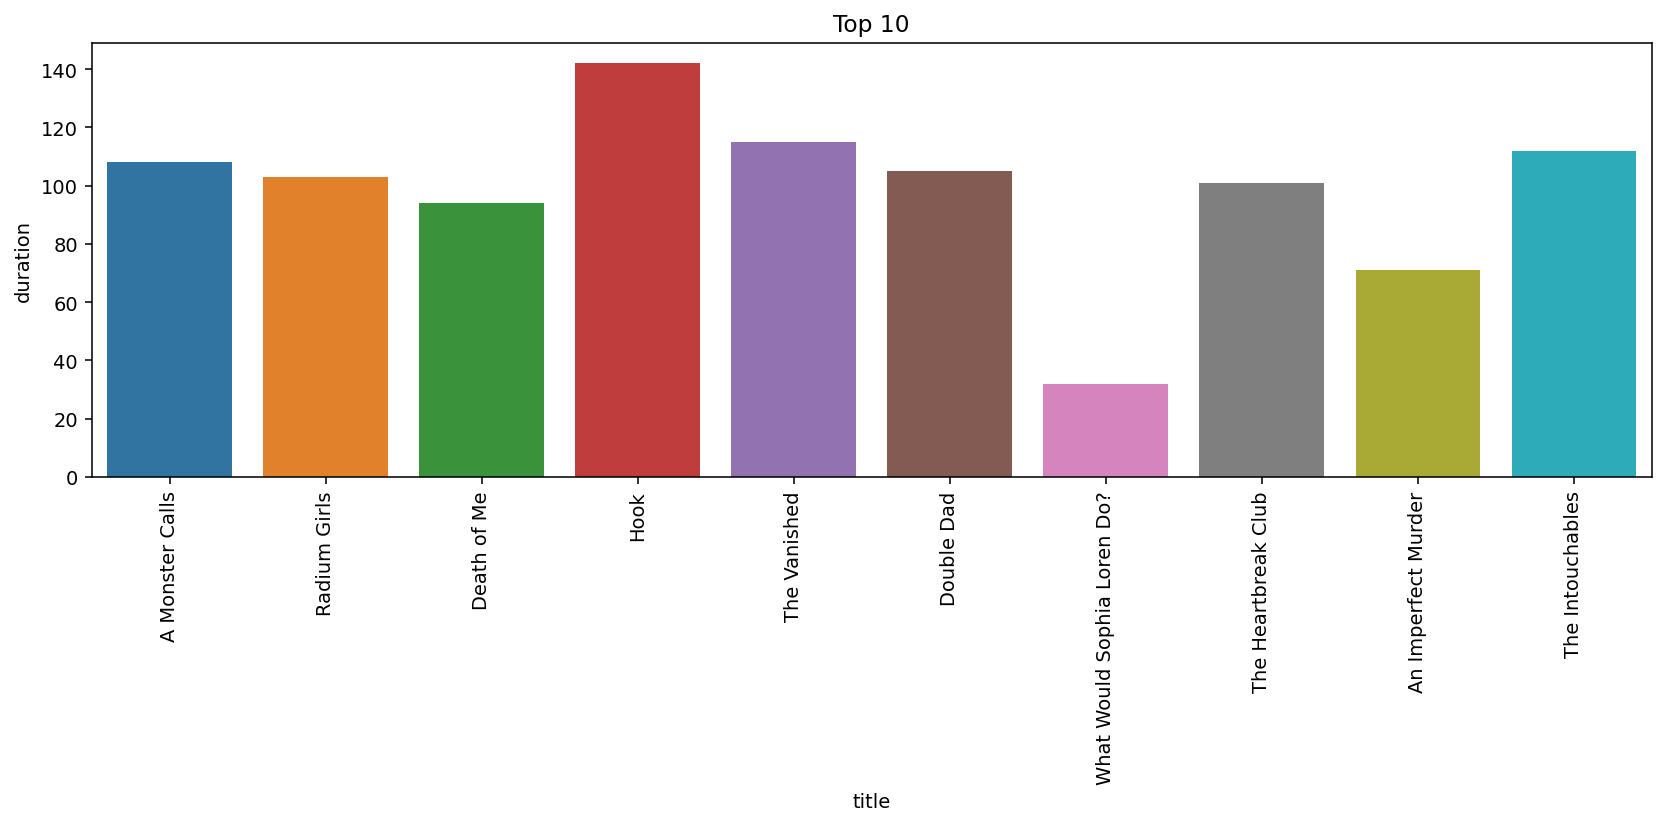

In [6]:
top = df_duration_over0.sort_values(by=['date_added', 'duration'], ascending=[False, False]).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration', data=top)
plt.xticks(rotation=90)
plt.xlabel('title')
plt.ylabel('duration')
plt.title('Top 10')
plt.tight_layout()
plt.show()

In [7]:
df_tv = df[df['type'] == 'TV Show']
df_tv.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1


In [8]:
df_movie = df[df['type'] == 'Movie']
df_movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN


In [9]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmmi10',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'cmr10',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXGeneral',
 'cmsy10',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'Nirmala UI',
 'Perpetua',
 'Gill Sans MT',
 'Han Santteut Dotum',
 'Tahoma',
 'Monotype Corsiva',
 'Brush Script MT',
 'Agency FB',
 'Wide Latin',
 'HYPMokGak-Bold',
 'SWGothe',
 'Bodoni MT',
 'Haettenschweiler',
 'Comic Sans MS',
 'SWMap',
 'Franklin Gothic Demi',
 'Gill Sans MT',
 'Mongolian Baiti',
 'Gigi',
 'Microsoft Himalaya',
 'Tem

# 2.2 TVShow 데이터만 담겨 있는 df_TVShow 를 만들고 업로드 된 연도, 해당하는 콘텐츠의 수, duration으로 구성된 데이터 프레임을 만들고 상위 20개 데이터를 보이시오.

In [10]:
df_TVShow = df[df['type'] == 'TV Show'].copy()
df_TVShow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1
12,s13,TV Show,1994,Diego Enrique Osorno,Missing,Mexico,2019-05-17,2019,TV-MA,NaN,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,Missing,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,2020,TV-14,NaN,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7767,TV Show,Zig & Sharko,Missing,Missing,France,2017-12-01,2016,TV-Y7,NaN,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",1
7767,s7768,TV Show,Zindagi Gulzar Hai,Missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,NaN,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1
7775,s7776,TV Show,Zoids Wild,Missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,NaN,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,1
7779,s7780,TV Show,Zona Rosa,Missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,NaN,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,1


In [11]:
df_TVShow['date_added'] = pd.to_datetime(df_TVShow['date_added'])
df_summary = df_TVShow.groupby('date_added').agg({'type': 'count', 'duration': 'sum'}).reset_index()
df_summary.columns = ['업로드된 연도', '콘텐츠 수', '총 상영 시간']
df_summary.head(20)

,업로드된 연도,콘텐츠 수,총 상영 시간
0,2008-02-04,1,0.0
1,2013-03-31,1,0.0
2,2013-08-02,1,0.0
3,2013-09-01,1,0.0
4,2013-10-08,1,0.0
5,2013-10-14,1,0.0
6,2014-02-01,1,0.0
7,2014-04-01,1,0.0
8,2014-11-19,2,0.0
9,2014-11-21,1,0.0


# 2.3 listed_in 컬럼의 제목을 genre 로 바꾸고 df_TVShow 프레임에 추가하시오.

In [13]:
df_TVShow.rename(columns={'listed_in': 'genre'}, inplace=True)
df_TVShow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1
12,s13,TV Show,1994,Diego Enrique Osorno,Missing,Mexico,2019-05-17,2019,TV-MA,NaN,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,Missing,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,2020,TV-14,NaN,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2


# 2.4 2.3에서 얻을 결과를 활용하여 연도순 genre 별 업로드 수를 시각화 하시오  

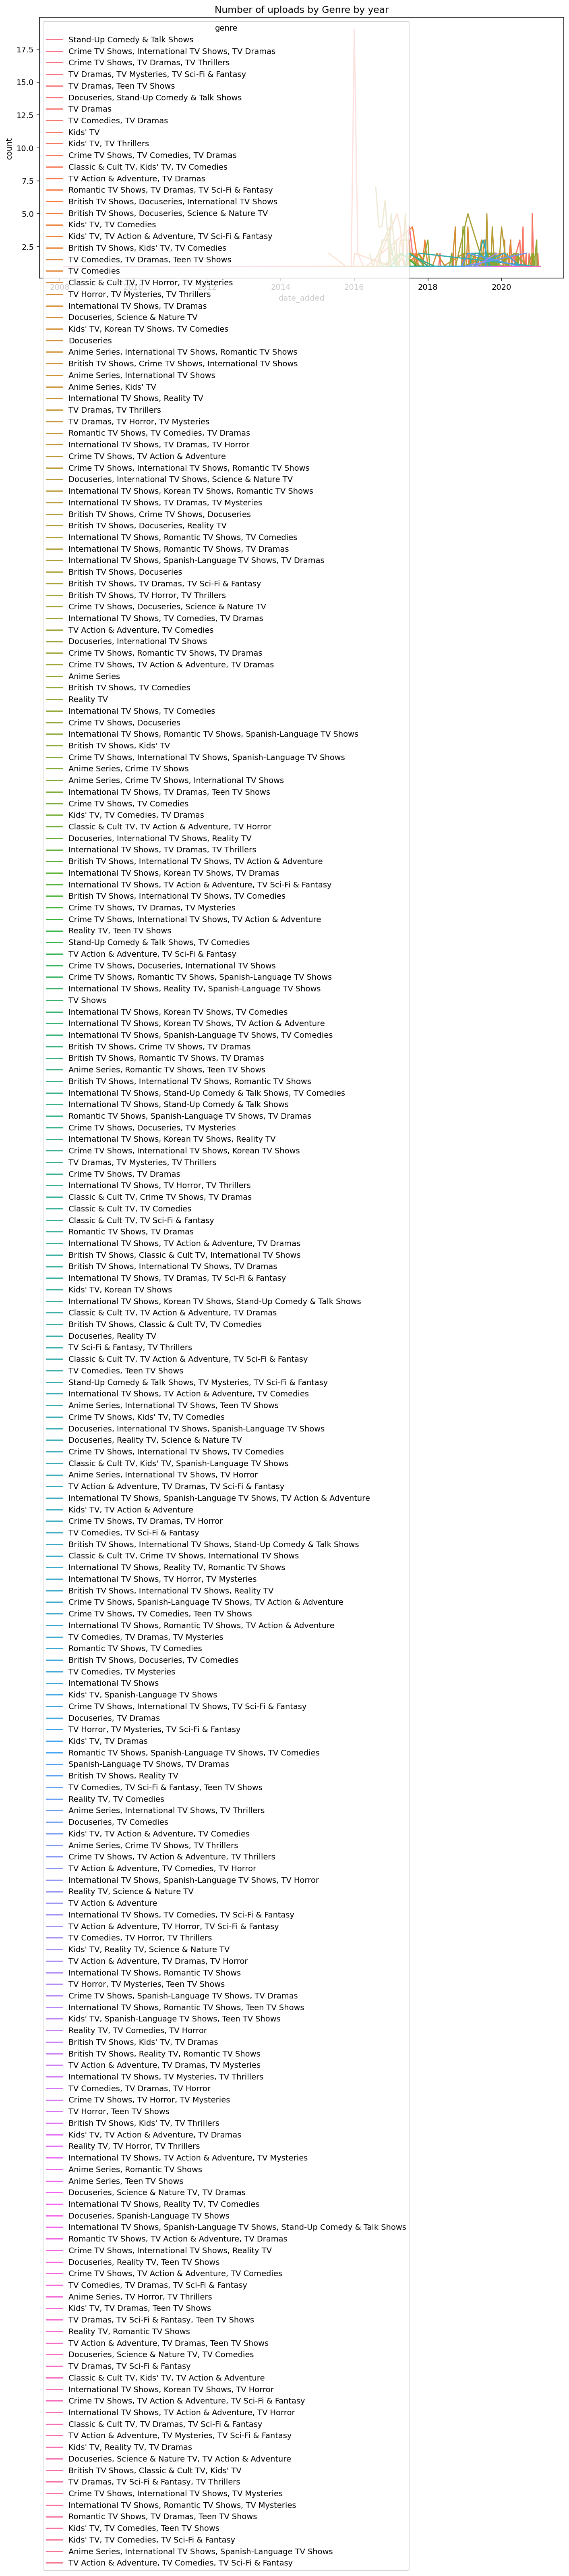

In [16]:
df_genre_count = df_TVShow.groupby(['date_added', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_added', y='count', hue='genre', data=df_genre_count)
plt.xlabel('date_added')
plt.ylabel('count')
plt.title('Number of uploads by Genre by year')
plt.tight_layout()
plt.show()